# ENRON fraud detection
Identify persons of interest (POIs) from ENRON financial and email data (educational purpose) 

In [78]:
# Import some modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys
import pickle

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [84]:
# Path to images and data
IMAGES = '../images/'
DATA   = '../data/'

In [ ]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

#features_list = ['poi','salary'] # You will need to use more features

In [10]:
### Load the dictionary containing the dataset
with open("../data/final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [15]:
data_Frame = pd.DataFrame(data_dict).transpose()

In [95]:
# Replace 'NaN' string with numpy.NaN
# Change POI from boolean to integer (poi: 1, no_poi: 0)
def repl_NaN(val):
    if val == 'NaN':
        val = np.NaN
    if isinstance(val, bool):
        val = int(val)
    return val

data_Frame = data_Frame.applymap(repl_NaN)

In [96]:
data_Frame.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,NaN,864523.0,0,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,1586055.0,2660303.0,0,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,...,NaN,69.0,0,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0


In [141]:
data_Frame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bonus,81.0,1.201773e+06,1.441679e+06,70000.0,425000.00,750000.0,1200000.00,8000000.0
deferral_payments,38.0,8.416025e+05,1.289323e+06,-102500.0,79644.50,221063.5,867211.25,6426990.0
deferred_income,48.0,-5.810498e+05,9.420764e+05,-3504386.0,-611209.25,-151927.0,-37926.00,-833.0
director_fees,16.0,8.982288e+04,4.111270e+04,3285.0,83674.50,106164.5,112815.00,137864.0
exercised_stock_options,101.0,2.959559e+06,5.499450e+06,3285.0,506765.00,1297049.0,2542813.00,34348384.0
expenses,94.0,5.419201e+04,4.610838e+04,148.0,22479.00,46547.5,78408.50,228763.0
from_messages,86.0,6.087907e+02,1.841034e+03,12.0,22.75,41.0,145.50,14368.0
from_poi_to_this_person,86.0,6.489535e+01,8.697924e+01,0.0,10.00,35.0,72.25,528.0
from_this_person_to_poi,86.0,4.123256e+01,1.000731e+02,0.0,1.00,8.0,24.75,609.0
loan_advances,3.0,2.797500e+07,4.638256e+07,400000.0,1200000.00,2000000.0,41762500.00,81525000.0


In [142]:
data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        81 non-null float64
deferral_payments            38 non-null float64
deferred_income              48 non-null float64
director_fees                16 non-null float64
email_address                111 non-null object
exercised_stock_options      101 non-null float64
expenses                     94 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                3 non-null float64
long_term_incentive          65 non-null float64
other                        91 non-null float64
poi                          144 non-null int64
restricted_stock             109 non-null float64
restricted_stock_deferred    17 non-null float64
salary                       94 non-null float64
shared_receipt_with_poi      86 non-null float6

In [238]:
feature_list = data_Frame.columns.to_list()
feature_list.remove('poi')
feature_list.remove('email_address')

In [120]:
data_Frame[ data_Frame['bonus'] >= 10000000 ]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,NaN,311764000.0,5235198.0,NaN,NaN,NaN,...,48521928.0,42667589.0,0,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0


In [126]:
# Dropping the 'TOTAL' instance
data_Frame.drop(labels='TOTAL', inplace=True)

In [135]:
data_Frame.loc['THE TRAVEL AGENCY IN THE PARK']

bonus                           NaN
deferral_payments               NaN
deferred_income                 NaN
director_fees                   NaN
email_address                   NaN
exercised_stock_options         NaN
expenses                        NaN
from_messages                   NaN
from_poi_to_this_person         NaN
from_this_person_to_poi         NaN
loan_advances                   NaN
long_term_incentive             NaN
other                        362096
poi                               0
restricted_stock                NaN
restricted_stock_deferred       NaN
salary                          NaN
shared_receipt_with_poi         NaN
to_messages                     NaN
total_payments               362096
total_stock_value               NaN
Name: THE TRAVEL AGENCY IN THE PARK, dtype: object

In [136]:
# Drop 'THE TRAVEL AGENCY IN THE PARK' instance. This is an agency and not a real person. In addition there is not much data available for this instance.
data_Frame.drop(labels='THE TRAVEL AGENCY IN THE PARK', inplace=True)

In [140]:
insider = data_Frame.index.to_list()

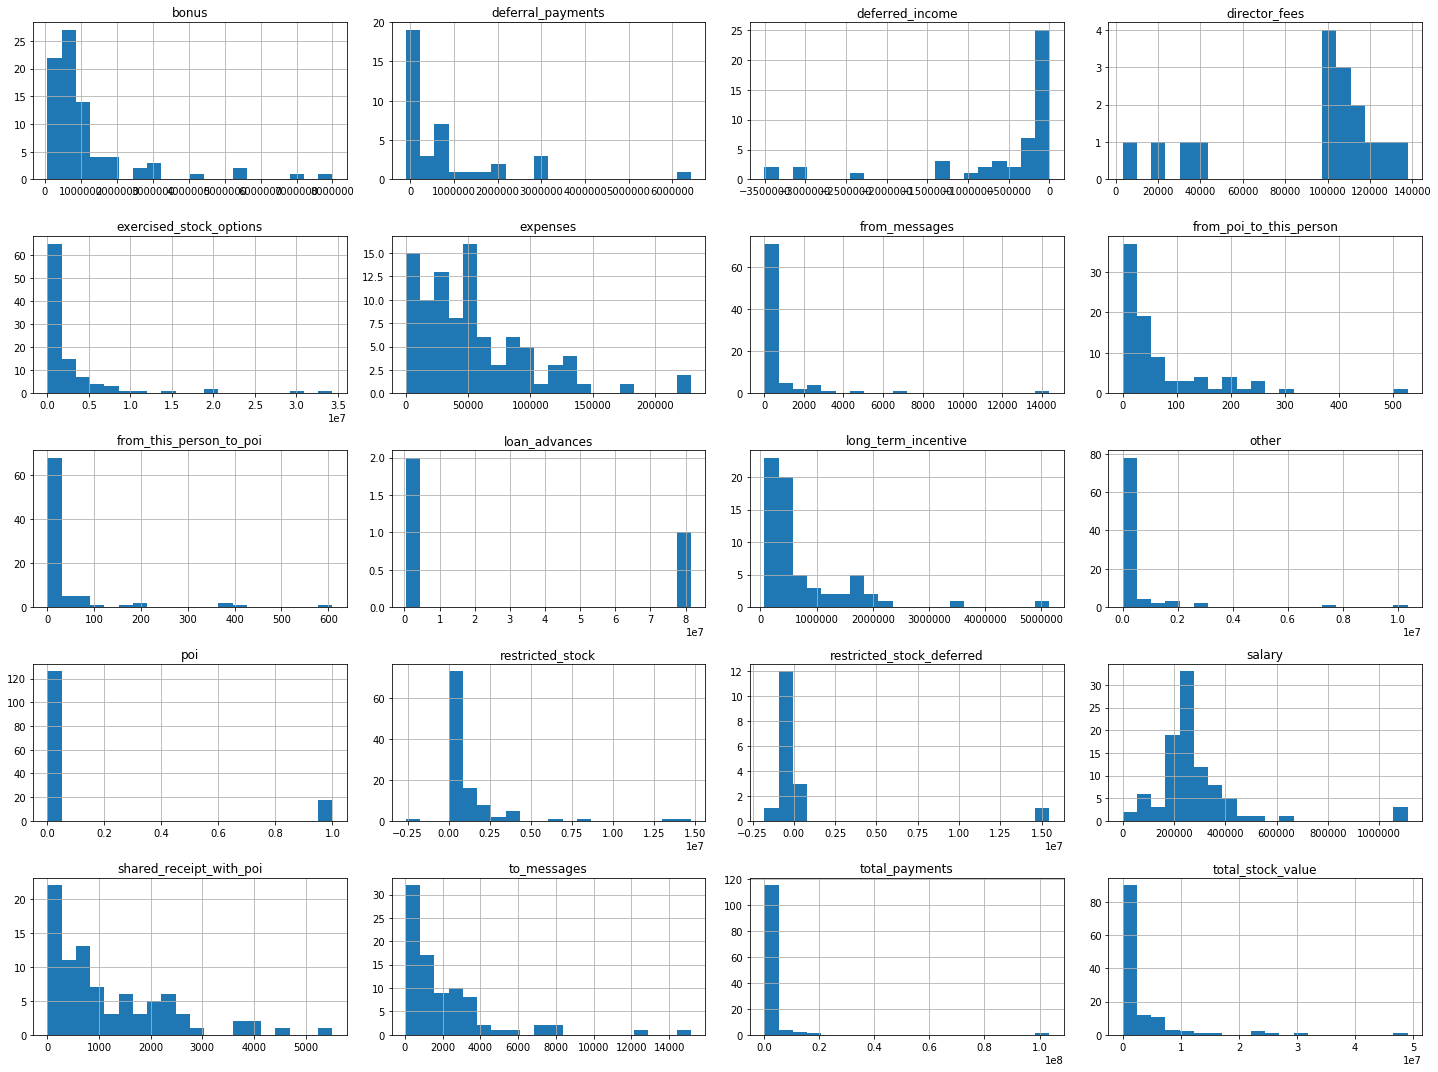

In [143]:
data_Frame.hist(bins=20,figsize=(20,15));
plt.tight_layout()
plt.savefig(IMAGES+"features_histogram_plots", dpi='figure')
plt.show()

In [197]:
def yield_feature(l):
    for f in l:
        yield f

In [239]:
boxplot_list = sorted(feature_list + ['poi'])

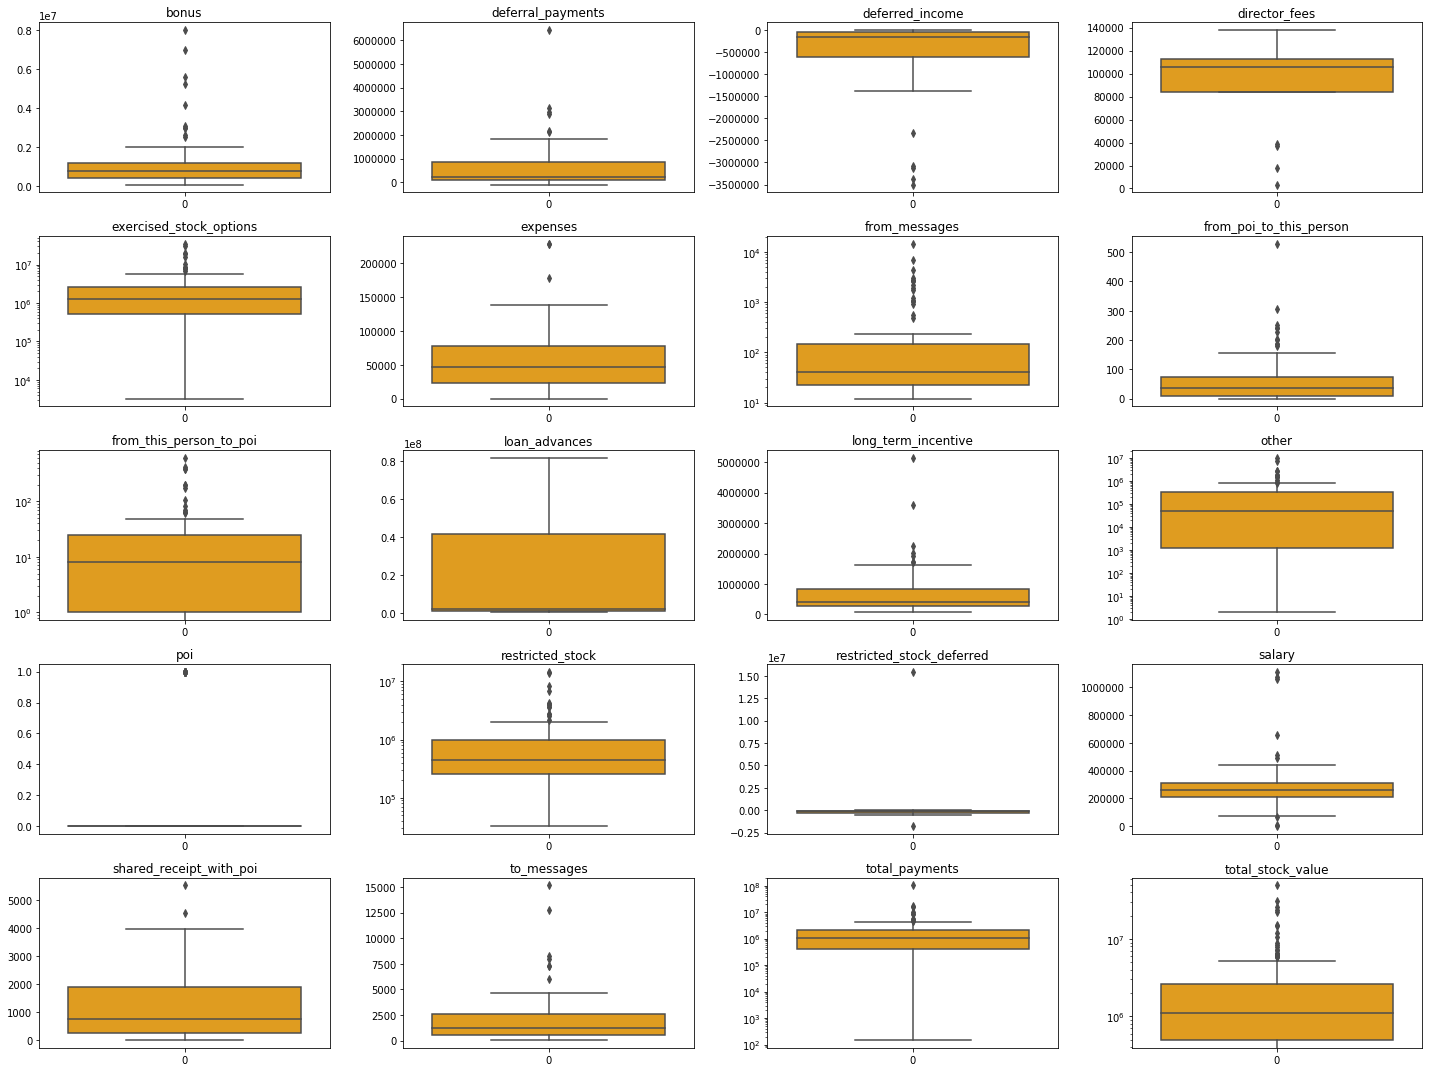

In [264]:
fig, ax = plt.subplots(5, 4, figsize=(20, 15))
feature = yield_feature(boxplot_list)
for row in range(5):
    for col in range(4):
        column = feature.next()
        sns.boxplot(data=data_Frame[column], ax=ax[row,col], color='orange')
        ax[row,col].set_title(column)
        if column in ['from_messages', 'from_this_person_to_poi', 'total_payments', 'total_stock_value', 'other', 'restricted_stock', 'exercised_stock_options']: #'restricted_stock_deferred', 
            ax[row,col].set_yscale('log')
plt.tight_layout()
plt.savefig(IMAGES+"features_box_plots", dpi='figure')
plt.show()

In [237]:
data_Frame[ data_Frame['deferral_payments'] >= 3000000 ]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
FREVERT MARK A,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,6.0,...,1617011.0,7427621.0,0,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0
HORTON STANLEY C,NaN,3131860.0,NaN,NaN,stanley.horton@enron.com,5210569.0,NaN,1073.0,44.0,15.0,...,NaN,NaN,0,2046079.0,NaN,NaN,1074.0,2350.0,3131860.0,7256648.0


In [244]:
data_Frame[ data_Frame['exercised_stock_options'] >= 10000000 ]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
FREVERT MARK A,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,6.0,...,1617011.0,7427621.0,0,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0
HIRKO JOSEPH,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,NaN,...,NaN,2856.0,1,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,...,3600000.0,10359729.0,1,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
PAI LOU L,1000000.0,NaN,NaN,NaN,lou.pai@enron.com,15364167.0,32047.0,NaN,NaN,NaN,...,NaN,1829457.0,0,8453763.0,NaN,261879.0,NaN,NaN,3123383.0,23817930.0
RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,...,1617011.0,174839.0,1,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,...,1920000.0,22122.0,1,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0


In [247]:
data_Frame[ data_Frame['other'] >= 10000000 ]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,...,3600000.0,10359729.0,1,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0


In [248]:
data_Frame[ data_Frame['restricted_stock_deferred'] >= 10000000 ]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BHATNAGAR SANJAY,NaN,NaN,NaN,137864.0,sanjay.bhatnagar@enron.com,2604490.0,NaN,29.0,0.0,1.0,...,NaN,137864.0,0,-2604490.0,15456290.0,NaN,463.0,523.0,15456290.0,NaN


In [249]:
data_Frame[ data_Frame['total_payments'] >= 10000000 ]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BHATNAGAR SANJAY,NaN,NaN,NaN,137864.0,sanjay.bhatnagar@enron.com,2604490.0,NaN,29.0,0.0,1.0,...,NaN,137864.0,0,-2604490.0,15456290.0,NaN,463.0,523.0,15456290.0,NaN
FREVERT MARK A,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,6.0,...,1617011.0,7427621.0,0,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0
LAVORATO JOHN J,8000000.0,NaN,NaN,NaN,john.lavorato@enron.com,4158995.0,49537.0,2585.0,528.0,411.0,...,2035380.0,1552.0,0,1008149.0,NaN,339288.0,3962.0,7259.0,10425757.0,5167144.0
LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,...,3600000.0,10359729.0,1,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0


In [279]:
data_Frame[ data_Frame['total_payments'].isna()  ]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
CHAN RONNIE,NaN,NaN,-98784.0,98784.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,32460.0,-32460.0,NaN,NaN,NaN,NaN,NaN
CHRISTODOULOU DIOMEDES,NaN,NaN,NaN,NaN,diomedes.christodoulou@enron.com,5127155.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,950730.0,NaN,NaN,NaN,NaN,NaN,6077885.0
CLINE KENNETH W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,662086.0,-472568.0,NaN,NaN,NaN,NaN,189518.0
CORDES WILLIAM R,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850.0,NaN,12.0,10.0,0.0,...,NaN,NaN,0,386335.0,NaN,NaN,58.0,764.0,NaN,1038185.0
FOWLER PEGGY,NaN,NaN,NaN,NaN,kulvinder.fowler@enron.com,1324578.0,NaN,36.0,0.0,0.0,...,NaN,NaN,0,560170.0,NaN,NaN,10.0,517.0,NaN,1884748.0
GATHMANN WILLIAM D,NaN,NaN,NaN,NaN,NaN,1753766.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,264013.0,-72419.0,NaN,NaN,NaN,NaN,1945360.0
GILLIS JOHN,NaN,NaN,NaN,NaN,NaN,9803.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,75838.0,NaN,NaN,NaN,NaN,NaN,85641.0
HAYSLETT RODERICK J,NaN,NaN,NaN,NaN,rod.hayslett@enron.com,NaN,NaN,1061.0,35.0,38.0,...,NaN,NaN,0,346663.0,NaN,NaN,571.0,2649.0,NaN,346663.0
HUGHES JAMES A,NaN,NaN,NaN,NaN,james.hughes@enron.com,754966.0,NaN,34.0,35.0,5.0,...,NaN,NaN,0,363428.0,NaN,NaN,589.0,719.0,NaN,1118394.0
LEWIS RICHARD,NaN,NaN,NaN,NaN,richard.lewis@enron.com,850477.0,NaN,26.0,10.0,0.0,...,NaN,NaN,0,NaN,NaN,NaN,739.0,952.0,NaN,850477.0


In [ ]:
### Task 2: Remove outliers

In [ ]:
### Task 3: Create new feature(s)

In [ ]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

In [ ]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [ ]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [ ]:
# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)